# AST4930 Homework Assignment #4 (20 pts)

### Instruction:

In this homework, we will build Random Forests to classify Super-Earth and Sub-Neptune (brief introduction to this problem in Week 8 slides). Now that we have learned how to inspect data, how to make figures, and how to implement different machine learning algorithms, in this homework we will try to do something more "real research" like problem solving.


Below you will find instruction to this homework assignment.

1. I learned that when I download your .ipynb file from Canvas, it automatically adds your name to the file name. So you don't have to put your last name manually.

2. As you will see, the Notebook is partially filled. Fill in the empty cells. 

3. Note that there are questions you will have to answer. They will start with "Q: ..." The answers will be graded so make sure you answer all the questions.

4. It's fine you work on somewhere else than HiPerGator. But when I grade your homework, I will run your Jupyter Notebook on HiPerGator. So before you submit your homework, make sure you test it on HiPerGator and see if you get any error messages. For this particular homework assignment, we are concerned about the computing time so I'd like you all to use the HiPerGator resources for a fair comparison. 

5. It's fine if you use someone else's code you found on Internet, but make sure you write down the source. You don't have to cite me when you use anything from AST4930 Notebook. But as we learned from Homework Assignment #2, I do make mistakes. So please double-check before you copy and paste my script!

6. It's a common sense but just to make sure... when you make a figure, make sure they are readable/understandable. If you cannot see the title, labels, data points, or if you don't understand the point of the figure, I won't probably be able to see/understand them either!

6. Submit your final .ipynb file via Canvas before the due date.

### Here I generously collected the data from Van Eylen et al. (2018) for you :)
 https://ui.adsabs.harvard.edu/abs/2018MNRAS.479.4786V/abstract

In [1]:
import numpy as np
import pandas as pd

X = np.loadtxt('/blue/ast4930/share/VanEylen.txt', 
               dtype={'names': ('name', 'Rp', 'Period', 'Mstar', 'Rstar'),
                     'formats': ('|U15',float,float,float,float)}
              )
X = pd.DataFrame(X)

In [2]:
X

,name,Rp,Period,Mstar,Rstar
0,Kepler-10b,1.473,0.837,0.920,1.0662
1,Kepler-10c,2.323,45.294,0.920,1.0662
2,Kepler-23b,1.694,7.107,1.078,1.5480
3,Kepler-23c,3.120,10.742,1.078,1.5480
4,Kepler-23d,2.235,15.274,1.078,1.5480
...,...,...,...,...,...
112,K02706.01,1.797,3.098,1.260,1.8600
113,Kepler-1392,0.684,2.128,0.990,1.3000
114,K02801.01,0.870,6.992,1.120,1.4500
115,Kepler-1394,1.040,3.938,1.510,1.9800


### To be filled: We don't have the label (i.e., SE vs. SN). Let's make label.
We will use the fit from Van Eylen et al. (2018). That is, if a planet's radius and orbital periods satisfy ${\rm log}_{10} R_p > m{\rm log}_{10} P + a$, where $m=-0.09$ and $a=0.37$, then we will label them as SN. Otherwise, we will label them as SE.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

m = -0.09
a = 0.37

X['SN'] = pd.DataFrame( (np.log10(X['Rp']) > (m*(np.log10(X['Period']) + a))) )
#https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o

#X_mapping = ['SN' if (np.log10(i) > (m*(np.log10(P) + a))) else 'M' if (np.log10(i) < (m*(np.log10(P) + a))) else 'S' for i in X['Rp'] for P in X['Period']]
#X_mapping = ['SN' if (np.log(X['Rp']) > (m*(np.log(X['Period']) + a))) else 'M' if (np.log(X['Rp']) < (m*(np.log(X['Period']) + a))) else 'S' for i in X]
##https://stackoverflow.com/questions/54787257/python-assign-labels-to-values-in-an-array/54787657
        
#X_mapping = pd.DataFrame(X_mapping)

In [17]:
X['SN']

0       True
1       True
2       True
3       True
4       True
       ...  
112     True
113    False
114     True
115     True
116     True
Name: SN, Length: 117, dtype: bool

In [18]:
X

,name,Rp,Period,Mstar,Rstar,SN,SE
0,Kepler-10b,1.473,0.837,0.920,1.0662,True,False
1,Kepler-10c,2.323,45.294,0.920,1.0662,True,False
2,Kepler-23b,1.694,7.107,1.078,1.5480,True,False
3,Kepler-23c,3.120,10.742,1.078,1.5480,True,False
4,Kepler-23d,2.235,15.274,1.078,1.5480,True,False
...,...,...,...,...,...,...,...
112,K02706.01,1.797,3.098,1.260,1.8600,True,False
113,Kepler-1392,0.684,2.128,0.990,1.3000,False,True
114,K02801.01,0.870,6.992,1.120,1.4500,True,False
115,Kepler-1394,1.040,3.938,1.510,1.9800,True,False


<AxesSubplot:>

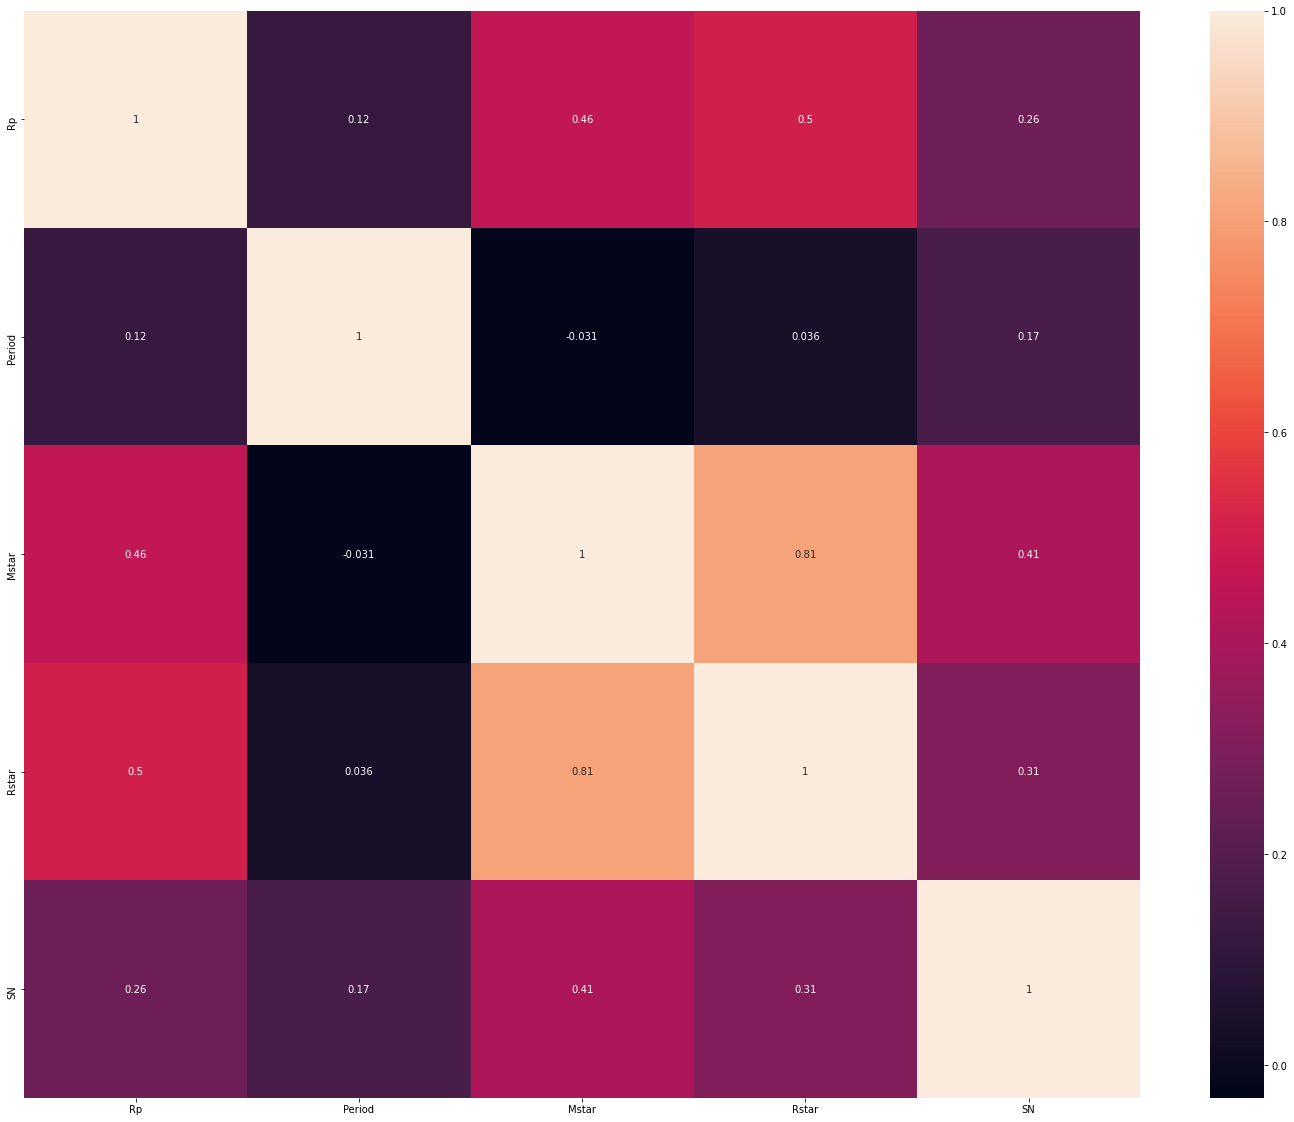

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
sns.heatmap(X.corr(), annot=True)

### To be filled: Make a orbital period - radius plot showing the Van Eylen sample with their class color-coded.
The resulting figure should look similar to Figure 2 of Van Eylen et al. (2018). Do you see the radius valley?

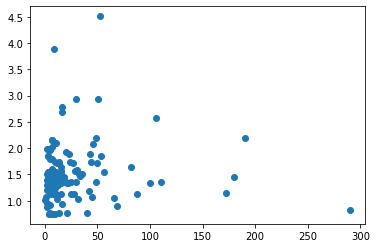

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))

Period = (X['Period'])
Radius = (X['Rstar'])

plt.plot(Period, Radius, 'o')



### To be filled: Now, let's make a RF model. 
Tip: You may want to use logarithmic values of planet radius and period since the radius valley is better seen in the log space.<br>
Try to find a good "n_estimators". You can use the "oob score".

### Q: What is the accuracy of your best model?

### To be filled: Let's check out which features are the most important.
Tip: RF comes with free feature importance.

### Q: Which feature(s) is important?

### To be filled: Now let's read in a noisier dataset.
We will collect stellar and planet parameters from the following two papers.<br>
Stellar parameters: https://cdsarc.cds.unistra.fr/viz-bin/cat/J/AJ/159/280#/browse<br>
Planet parameters: https://cdsarc.cds.unistra.fr/viz-bin/cat/J/AJ/160/108#/browse<br>

From stellar parameters Table 2 is what we need. For planet parameters, we need Table 1. Check out the ReadMe files to see what's in the files. Save them on your local machine and then upload the files to your working directory on HiPerGator (e.g., /blue/ast4930/jbae/homework4/).


### To be filled: Now let's read in the stellar and planet parameters.
You can use a similar syntax that I used to load the Van Eylen data above.

### If you read in the stellar parameter file correctly you should see something like the following.

,KIC,Mstar,Tstar,gstar,Zstar,Rstar,rhostar,Lstar,Astar,dstar
0,757076,1.396,5052.2,3.373,-0.143,4.003,-1.672,0.976,2.47,22.6
1,757099,0.873,5364.9,4.318,0.078,1.068,-0.149,-0.066,15.20,7.1
2,757137,1.669,4628.7,2.388,-0.113,13.591,-3.187,1.884,1.51,12.2
3,757280,1.715,6856.8,3.834,-0.030,2.610,-1.022,1.135,1.24,19.4
4,757450,0.914,5301.2,4.432,0.242,0.957,0.010,-0.182,9.46,24.0
...,...,...,...,...,...,...,...,...,...,...
186296,12984214,0.933,5305.6,4.215,0.203,1.153,-0.321,-0.003,10.66,414.8
186297,12984227,1.073,3455.0,0.632,0.080,82.730,-5.733,2.950,7.97,499.8
186298,12984307,1.156,5892.6,4.123,0.083,1.542,-0.506,0.415,5.33,11.8
186299,12984404,1.564,4612.4,2.501,0.220,11.444,-3.002,1.731,2.32,42.2


### If you read in the planet parameter file correctly you should see something like the following.

,KIC,KOI,status,Rp,distance,flux,zamsflux
0,11446443,1.01,CONFIRMED,14.21,0.0355,854.78,524.75
1,10666592,2.01,CONFIRMED,16.45,0.0381,4285.95,2394.68
2,10748390,3.01,CONFIRMED,4.88,0.0516,86.58,58.22
3,3861595,4.01,CONFIRMED,13.18,0.0583,5244.42,3647.63
4,11853905,7.01,CONFIRMED,4.01,0.0455,1247.17,719.80
...,...,...,...,...,...,...,...
3882,8329346,8275.01,CANDIDATE,4.06,0.9959,0.55,0.41
3883,8637903,8276.01,CANDIDATE,3.48,1.1260,2.29,1.86
3884,9011955,8279.01,CANDIDATE,55.22,1.0602,2.96,1.32
3885,9159288,8280.01,CANDIDATE,3.01,0.3458,22.92,16.13


### To be filled: What we need are the radius and orbital period of the "confirmed" planets (let's remove the candidates) and their host stars' mass and radius -- these are the ones in the Van Eylen data. Make a single dataframe containing these information.
Tip: We have two separate datasets and we need "crossmatch" the data! Remember what Kim et al. (2014) did for their variable star classification? Here, we can use the KIC (Kepler Input Catalog ID #).
Tip #2: In the planet parameter, you will see that we have orbital distance in astronomical units instead of the orbital period. So we need to create a new feature. How can we relate the orbital distance and orbital period? We can use the Kepler's third law to do this.

### To be filled: Make predictions using your RF model.
Tip: If you used log values (which I suggest), you need to use log values for the evaluation data.

### To be filled: Make a plot showing the planet radius vs. orbital period with your prediction color-coded. This should look similar to what you've done with Van Eylen data (but a lot more data points). 


### Q: How does the classification look like? Did it work well?

### Q: What are your thoughts on more research-like problem solving? Did you enjoy?